### Digit Recognizer

https://www.kaggle.com/c/digit-recognizer

In [2]:
pip install opencv-python

  Using cached opencv_python-4.5.5.64-cp36-abi3-win_amd64.whl (35.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Загружаем исходные данные

In [5]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [6]:
# Сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# Приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [7]:
train_img.shape

(42000, 28, 28)

### Визуализируем исходные данные

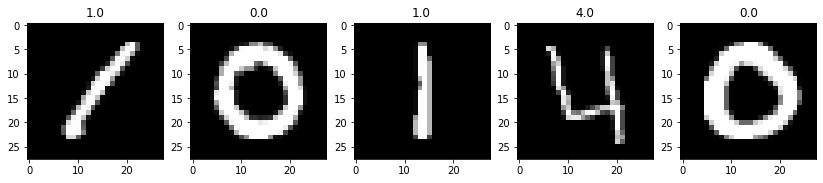

In [8]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

### Готовим данные к понижению размерности методом РСА

In [9]:
# Выбираем семпл данных для обработки
X_train = train_img.reshape(-1, 28 * 28).astype(np.float32)
X_test = test_img.reshape(-1, 28 * 28).astype(np.float32)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
# Нормализуем данные
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Выбираем 20 компонент и понижаем раpмерность с помощью PCA

In [13]:
pca = PCA(n_components=20)

In [14]:
X_train = pca.fit_transform(X_train_sc)
X_test = pca.transform(X_test_sc)

### Разбиваем выборку на обучение и валидацию

In [15]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, X_train, test_size=0.2,
    random_state=42)

### Используем DecisionTreeClassifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model = DecisionTreeClassifier()

In [19]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
pred_val = model.predict(x_val)

### Оцениваем качество решения на валидационной выборке

In [21]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.8307142857142857


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       816
         1.0       0.93      0.97      0.95       909
         2.0       0.83      0.81      0.82       846
         3.0       0.81      0.77      0.79       937
         4.0       0.83      0.79      0.81       839
         5.0       0.75      0.78      0.76       702
         6.0       0.88      0.91      0.89       785
         7.0       0.84      0.85      0.84       893
         8.0       0.77      0.76      0.77       835
         9.0       0.74      0.78      0.76       838

    accuracy                           0.83      8400
   macro avg       0.83      0.83      0.83      8400
weighted avg       0.83      0.83      0.83      8400



In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[723   1   9  14   6  20  15   4  17   7]
 [  0 881   3   3   2   4   4   5   6   1]
 [ 14  10 687  29  19  12  18  15  35   7]
 [  4   9  45 724   5  49   3  15  54  29]
 [  7   7  12   8 664  13  18  16  15  79]
 [ 16   4   9  34  13 545  23   7  29  22]
 [ 12   5  21   2   9  12 711   0  11   2]
 [  3  11  15  10  13  12   3 755   7  64]
 [ 11  14  19  49  13  44  13  15 638  19]
 [  3   3   8  16  58  17   0  70  13 650]]


### Предсказания на тестовыйх данных

In [24]:
pred_test = model.predict(X_test)

### Визуализируем предсказания

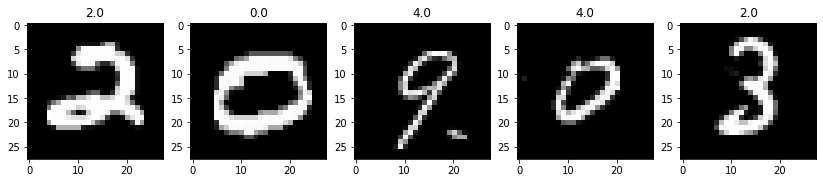

In [26]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

### Готовим файл для отправки

In [29]:
import pandas as pd
output = pd.read_csv("sample_submission.csv")
output['Label'] = pred_test.astype(int)
output.to_csv('submission.csv', index=False)
output

,ImageId,Label
0,1,2
1,2,0
2,3,4
3,4,4
4,5,2
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,5
